# Outline

### Motivation for the project:
+ Research Question
+ Data
+ Model
+ Figures
+ Main Takeaways


In [8]:
# Import required packages

import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline


In [5]:
# Read required datasets
df = pd.read_csv('ttb_county_clean.csv')
df1 = pd.read_csv('df_panel_fix.csv')

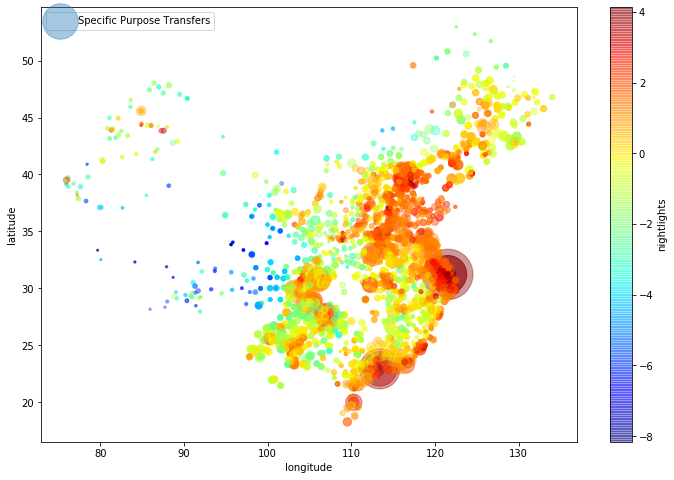

In [6]:
# Motivation for Project
# Real Purpose of Transfers

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["specific"]/100, label="Specific Purpose Transfers", figsize=(12,8),
    c="nightlights", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [9]:
lin_reg = smf.ols('np.log(specific) ~ np.log(gdp) + np.log(fdi) + i + rnr + rr + C(province) + C(year)', data=df1).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(specific)   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     24.06
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           8.01e-66
Time:                        20:34:20   Log-Likelihood:                -181.04
No. Observations:                 285   AIC:                             452.1
Df Residuals:                     240   BIC:                             616.4
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      14.7366      4.206      3.504      0.001       6.451      23.022
C(province)[T.Beijing]         -0.0346      0.266     -0.130      0.897      -0.558       0.489
C(province)[T.Chongqing]       -0.1765      0.488     -0.362      0.718      -1.137       0.784
C(province)[T.Fujian]          -0.6959      0.261     -2.669      0.008      -1.210      -0.182
C(province)[T.Gansu]           -0.4626      0.620     -0.746      0.456      -1.684       0.759
C(province)[T.Guangdong]        1.3153      0.771      1.705      0.089      -0.204       2.835
C(province)[T.Guangxi]         -0.3288      0.288     -1.142      0.255      -0.896       0.239
C(province)[T.Guizhou]         -0.6086      0.611     -0.997      0.320      -1.811       0.594
C(province)[T.Hainan]          -1.8147      1.156     -1.570      0.118      -4.091       0.462
C(province)[T.Hebei]            0.5428      0.426      1.274      0.204      -0.296       1.382
C(province)[T.Heilongjiang]     0.6145      0.214      2.865      0.005       0.192       1.037
C(province)[T.Henan]            0.6042      0.386      1.565      0.119      -0.156       1.365
C(province)[T.Hubei]           -0.0554      0.239     -0.232      0.817      -0.526       0.415
C(province)[T.Hunan]            0.4026      0.236      1.702      0.090      -0.063       0.868
C(province)[T.Jiangsu]          0.4451      0.597      0.746      0.456      -0.730       1.620
C(province)[T.Jiangxi]         -0.1455      0.344     -0.423      0.673      -0.823       0.532
C(province)[T.Jilin]            0.1529      0.387      0.395      0.693      -0.609       0.915
C(province)[T.Liaoning]     -4.241e-16   2.15e-16     -1.969      0.050   -8.48e-16    2.01e-19
C(province)[T.Ningxia]         -1.8168      1.255     -1.448      0.149      -4.288       0.655
C(province)[T.Qinghai]         -1.8143      1.325     -1.369      0.172      -4.425       0.797
C(province)[T.Shaanxi]         -0.8817      0.318     -2.773      0.006      -1.508      -0.255
C(province)[T.Shandong]         0.6770      0.658      1.029      0.305      -0.619       1.973
C(province)[T.Shanghai]        -1.8249      0.361     -5.057      0.000      -2.536      -1.114
C(province)[T.Shanxi]           0.0097      0.327      0.030      0.976      -0.635       0.654
C(province)[T.Sichuan]          0.6499      0.280      2.323      0.021       0.099       1.201
C(province)[T.Tianjin]         -2.0987      0.365     -5.753      0.000      -2.817      -1.380
C(province)[T.Tibet]           -2.5255      1.780     -1.418      0.157      -6.033       0.982
C(province)[T.Xinjiang]        -0.8637      0.488     -1.770      0.078      -1.825       0.097
C(province)[T.Yunnan]           0.4095      0.303      1.349      0.178      -0.188       1.007
C(province)

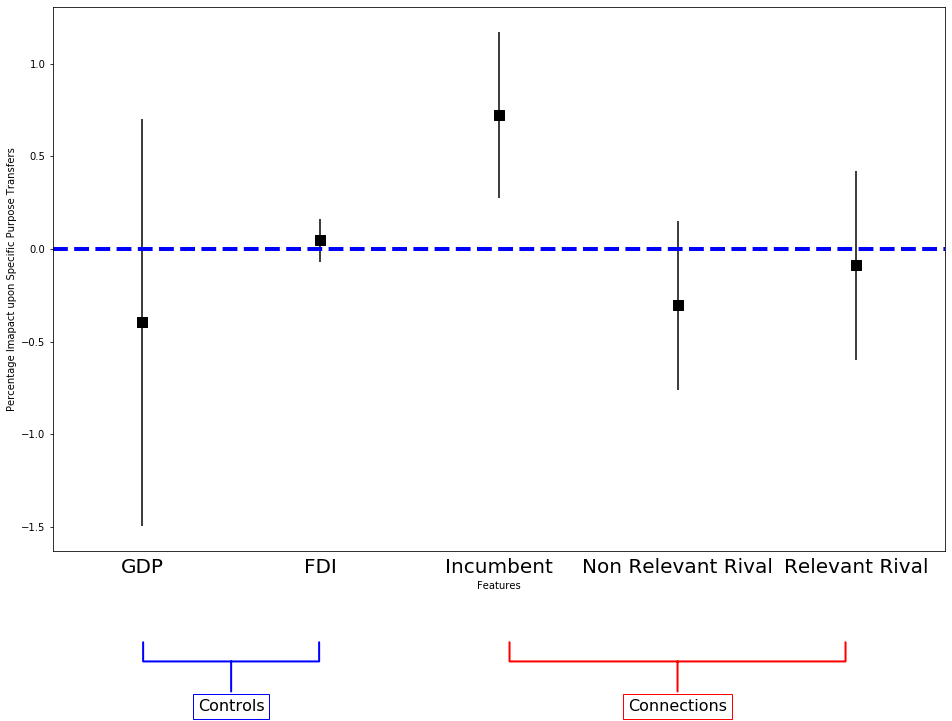

In [10]:
coef_df = pd.read_csv('coef.csv')


fig, ax = plt.subplots(figsize=(16, 10))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Percentage Imapact upon Specific Purpose Transfers')
ax.set_xlabel('Features')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='blue', linewidth=4)
ax.xaxis.set_ticks_position('none')

_ = ax.set_xticklabels(['GDP', 'FDI', 'Incumbent', 'Non Relevant Rival', 'Relevant Rival'], 
                       rotation=0, fontsize=20)

fs = 16
ax.annotate('Controls', xy=(0.2, -0.2), xytext=(0.2, -0.3), 
            xycoords='axes fraction', 
            textcoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', ec='blue'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1.2', lw=2.0, color='blue'))

_ = ax.annotate('Connections', xy=(0.7, -0.2), xytext=(0.7, -0.3), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=fs, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='red'),
                 arrowprops=dict(arrowstyle='-[, widthB=10.5, lengthB=1.2', lw=2.0, color='red'))
